# KNN: Choosing K Value with Iris Data

In [12]:
#data set of iris
library(ISLR)
head(iris)
str(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


## Standardize Data

In [13]:
standardized_iris <- scale(iris[1:4])
var(standardized_iris[,3])
#join the standardized data iwth the species column
final_data <- cbind(standardized_iris, iris[5])
head(final_data)

[1] 1

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


## TRAIN AND TEST SPLITS

In [14]:
library(caTools)
split <- sample.split(final_data$Species, SplitRatio = 0.7)
train <- subset(final_data, split == TRUE)
test <- subset(final_data, split == FALSE)

## Build a KNN Model

In [15]:
library(class) #knn is in class library
predicted_species <- knn(train[1:4], test[1:4], train$Species, k=1)
predicted_species
misclass_rate <- mean(test$Species != predicted_species)
misclass_rate

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

[1] 0.04444444

## Choosing K Value

In [16]:
predicted_species <- NULL
misclass_rate <- NULL

In [17]:
for(i in 1:10){
  set.seed(101)
  predicted_species <- knn(train[1:4], test[1:4], train$Species, k=i)
  misclass_rate[i] <- mean(test$Species != predicted_species)
}

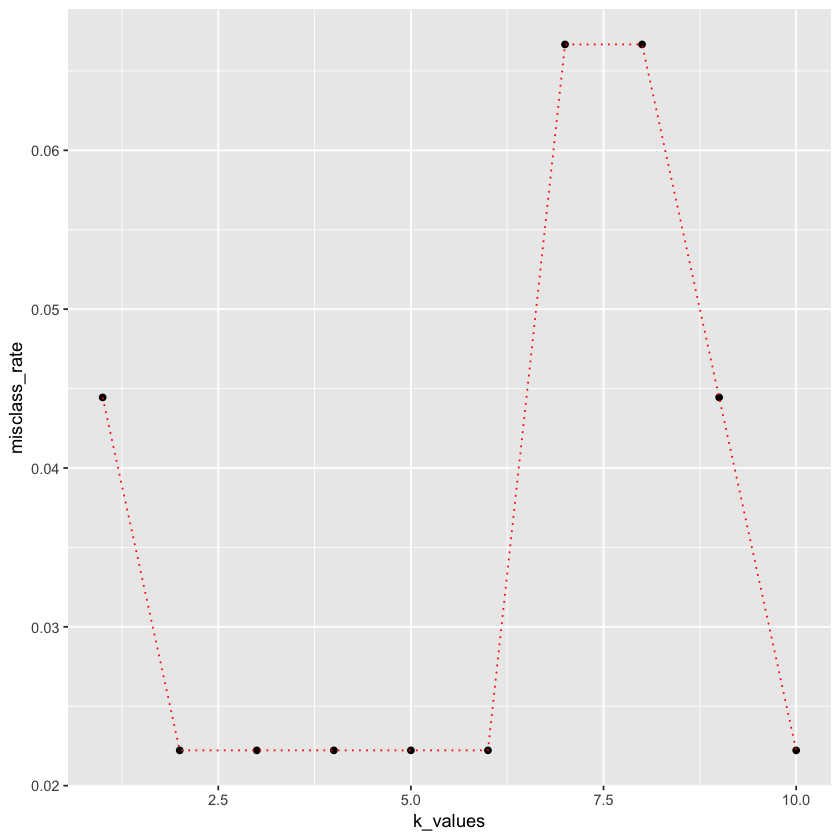

In [19]:
library(ggplot2)
k_values <- 1:10
error_df <- data.frame(misclass_rate, k_values)
pl <- ggplot(error_df, aes(x=k_values, y=misclass_rate)) + geom_point() + geom_line(lty='dotted', color='red')
pl

Error drops to its lowest for k values between 2-6 so for any of those it could work.